In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import io, color

In [46]:
def gradient_info(img):
    height=img.shape[0]
    width=img.shape[1]
    magnitude=[]
    direction=[]

    for j in range(height):
        mag_temp=[]
        dir_temp=[]
        for i in range(width):
            Gx=0
            Gy=0

            # compute Gx= Img(x+1,y)- Img(x-1,y)
            if i+1>=width and i>0:
                Gx= - img[j][i-1]
            elif i+1< width and i==0:
                Gx= img[j][i+1]
            else:
                Gx= img[j][i+1] - img[j][i-1]

            # compute Gy= Img(x,y+1)- Img(x,y-1)
            if j+1>=height and j>0:
                Gy= - img[j-1][i]
            elif j+1< height and j==0:
                Gy= img[j+1][i]
            else:
                Gy= img[j+1][i] - img[j-1][i]

            # compute magnitude and save it in the list 
            mag_temp.append(math.sqrt(Gx**2 + Gy**2))

            # compute angle and save it in the list
            if Gx==0: 
                dir_temp.append(math.degrees(0.0))
            elif Gy==0:
                dir_temp.append(math.degrees(-math.pi/2.0))
            else: 
                dir_temp.append(float(math.degrees(np.arctan(Gx/Gy))))
                    
        magnitude.append(mag_temp)
        direction.append(dir_temp)  

    magnitude=np.array(magnitude)
    direction=np.array(direction)  

    return magnitude,direction

Text(0.5, 1.0, 'Gradient direction')

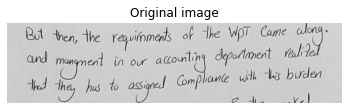

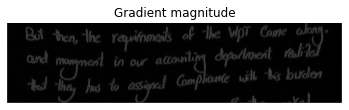

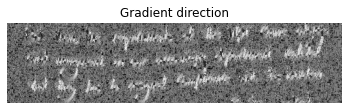

In [47]:
img = np.array(color.rgb2gray(io.imread("F1/F1-10.jpg")))

gradient_magnitude,gradient_direction=gradient_info(img)

# print(magnitude.shape,direction.shape)

plt.figure(1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original image")


plt.figure(2)
plt.imshow(gradient_magnitude, cmap="gray")
plt.axis("off")
plt.title("Gradient magnitude")

plt.figure(3)
plt.imshow(gradient_direction, cmap="gray")
plt.axis("off")
plt.title("Gradient direction")

In [48]:
# given an img divided into separated lines
# for each line, will divide it into 6 separate regions and compute gradient magnitude and direction for each region
def divide_line_to_regions(line_img):
    return 